In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_excel(r'C:\Users\sw.shin\Downloads\02_TIGER200.xlsx', sheet_name='Sheet1', index_col=0)
dg=pd.read_excel(r'C:\Users\sw.shin\Downloads\02_TIGER200.xlsx', sheet_name='Sheet2', index_col=0)
df

,TIGER 200
D A T E,
2013-12-30,26670.0
2014-01-02,25975.0
2014-01-03,25705.0
2014-01-06,25760.0
2014-01-07,25855.0
...,...
2019-12-03,27665.0
2019-12-04,27490.0
2019-12-05,27420.0


In [3]:
df['TIGER 인버스']=dg
df

,TIGER 200,TIGER 인버스
D A T E,,
2013-12-30,26670.0,8000.0
2014-01-02,25975.0,8215.0
2014-01-03,25705.0,8320.0
2014-01-06,25760.0,8275.0
2014-01-07,25855.0,8265.0
...,...,...
2019-12-03,27665.0,7455.0
2019-12-04,27490.0,7500.0
2019-12-05,27420.0,7520.0


In [4]:
X=10
Y=20

In [5]:
df['MA'+str(X)]=df['TIGER 200'].rolling(window=X).mean()
df['MA'+str(Y)]=df['TIGER 200'].rolling(window=Y).mean()
df

,TIGER 200,TIGER 인버스,MA10,MA20
D A T E,,,,
2013-12-30,26670.0,8000.0,NaN,NaN
2014-01-02,25975.0,8215.0,NaN,NaN
2014-01-03,25705.0,8320.0,NaN,NaN
2014-01-06,25760.0,8275.0,NaN,NaN
2014-01-07,25855.0,8265.0,NaN,NaN
...,...,...,...,...
2019-12-03,27665.0,7455.0,28042.5,28245.50
2019-12-04,27490.0,7500.0,27964.0,28195.25
2019-12-05,27420.0,7520.0,27920.0,28144.25


C:\Users\sw.shin\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


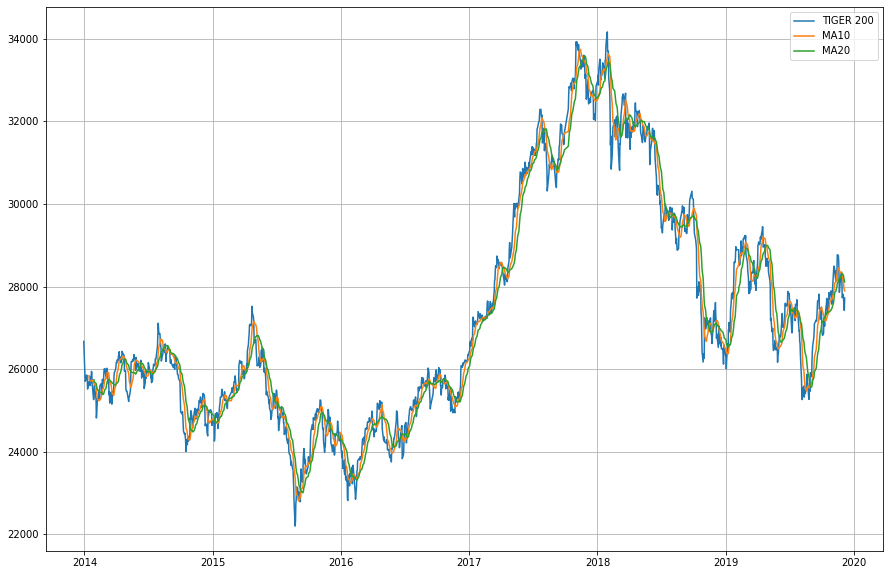

In [6]:
plt.figure(figsize=(15,10))
plt.plot(df.index, df['TIGER 200'], label='TIGER 200')
plt.plot(df.index, df['MA'+str(X)], label='MA'+str(X))
plt.plot(df.index, df['MA'+str(Y)], label='MA'+str(Y))
plt.legend()
plt.grid()
plt.show()

In [7]:
# 매수신호, 매도신호 입력
df2=df[Y-1:-1]
df2['매수신호']='No'
df2['매도신호']='No'
df2['보유여부']='No'
for i in range(1,len(df2)):
    if df2.loc[df2.index[i-1],'MA'+str(X)]<df2.loc[df2.index[i-1],'MA'+str(Y)]:
        if df2.loc[df2.index[i],'MA'+str(X)]>df2.loc[df2.index[i],'MA'+str(Y)]: #상방 돌파신호
            df2.loc[df2.index[i], '매수신호']='Yes'

for i in range(1,len(df2)):
    if df2.loc[df2.index[i-1],'MA'+str(X)]>df2.loc[df2.index[i-1],'MA'+str(Y)]:
        if df2.loc[df2.index[i],'MA'+str(X)]<df2.loc[df2.index[i],'MA'+str(Y)]: #하방 돌파신호
            df2.loc[df2.index[i], '매도신호']='Yes'
            
df2.head()

C:\Users\sw.shin\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\sw.shin\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\sw.shin\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning

,TIGER 200,TIGER 인버스,MA10,MA20,매수신호,매도신호,보유여부
D A T E,,,,,,,
2014-01-28,25300.0,8445.0,25645.5,25742.00,No,No,No
2014-01-29,25610.0,8370.0,25636.5,25689.00,No,No,No
2014-02-03,25275.0,8475.0,25582.0,25654.00,No,No,No
2014-02-04,24815.0,8640.0,25503.5,25609.50,No,No,No
2014-02-05,24925.0,8595.0,25420.5,25567.75,No,No,No


In [8]:
for i in range(1,(len(df2))):
    if df2.loc[df2.index[i],'매수신호']=='Yes':
        df2.loc[df2.index[i],'보유여부']='TIGER 200'
    elif df2.loc[df2.index[i],'매도신호']=='Yes':
        df2.loc[df2.index[i],'보유여부']='TIGER 인버스'
    else:
        if df2.loc[df2.index[i-1],'보유여부']=='TIGER 200':
            df2.loc[df2.index[i],'보유여부']='TIGER 200'
        elif df2.loc[df2.index[i-1],'보유여부']=='TIGER 인버스':
            df2.loc[df2.index[i],'보유여부']='TIGER 인버스'
df2.head(50)

,TIGER 200,TIGER 인버스,MA10,MA20,매수신호,매도신호,보유여부
D A T E,,,,,,,
2014-01-28,25300.0,8445.0,25645.5,25742.00,No,No,No
2014-01-29,25610.0,8370.0,25636.5,25689.00,No,No,No
2014-02-03,25275.0,8475.0,25582.0,25654.00,No,No,No
2014-02-04,24815.0,8640.0,25503.5,25609.50,No,No,No
2014-02-05,24925.0,8595.0,25420.5,25567.75,No,No,No
2014-02-06,25110.0,8530.0,25337.0,25530.50,No,No,No
2014-02-07,25300.0,8475.0,25276.5,25503.25,No,No,No
2014-02-10,25290.0,8460.0,25244.0,25481.25,No,No,No
2014-02-11,25430.0,8420.0,25231.5,25477.00,No,No,No


In [10]:
# 일간 수익률 입력
df2['daily TIGER 200 return']=df2['TIGER 200'].pct_change()
df2['daily TIGER 인버스 return']=df2['TIGER 인버스'].pct_change()
df2.head(30)

C:\Users\sw.shin\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\sw.shin\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,TIGER 200,TIGER 인버스,MA10,MA20,매수신호,매도신호,보유여부,daily TIGER 200 return,daily TIGER 인버스 return
D A T E,,,,,,,,,
2014-01-28,25300.0,8445.0,25645.5,25742.00,No,No,No,NaN,NaN
2014-01-29,25610.0,8370.0,25636.5,25689.00,No,No,No,0.012253,-0.008881
2014-02-03,25275.0,8475.0,25582.0,25654.00,No,No,No,-0.013081,0.012545
2014-02-04,24815.0,8640.0,25503.5,25609.50,No,No,No,-0.018200,0.019469
2014-02-05,24925.0,8595.0,25420.5,25567.75,No,No,No,0.004433,-0.005208
2014-02-06,25110.0,8530.0,25337.0,25530.50,No,No,No,0.007422,-0.007563
2014-02-07,25300.0,8475.0,25276.5,25503.25,No,No,No,0.007567,-0.006448
2014-02-10,25290.0,8460.0,25244.0,25481.25,No,No,No,-0.000395,-0.001770
2014-02-11,25430.0,8420.0,25231.5,25477.00,No,No,No,0.005536,-0.004728


In [11]:
# 시작일 구하기
start=[]
for i in range(len(df2)):
    if df2.loc[df2.index[i-1],'매수신호']=='No':
        if df2.loc[df2.index[i],'매수신호']=='Yes':
            start.append(i)
start[0]

14

In [12]:
# 포트폴리오 구성
df2['Portfolio']=0
df2.loc[df2.index[0:start[0]+1], 'Portfolio']=1000000
df2

C:\Users\sw.shin\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,TIGER 200,TIGER 인버스,MA10,MA20,매수신호,매도신호,보유여부,daily TIGER 200 return,daily TIGER 인버스 return,Portfolio
D A T E,,,,,,,,,,
2014-01-28,25300.0,8445.0,25645.5,25742.00,No,No,No,NaN,NaN,1000000
2014-01-29,25610.0,8370.0,25636.5,25689.00,No,No,No,0.012253,-0.008881,1000000
2014-02-03,25275.0,8475.0,25582.0,25654.00,No,No,No,-0.013081,0.012545,1000000
2014-02-04,24815.0,8640.0,25503.5,25609.50,No,No,No,-0.018200,0.019469,1000000
2014-02-05,24925.0,8595.0,25420.5,25567.75,No,No,No,0.004433,-0.005208,1000000
...,...,...,...,...,...,...,...,...,...,...
2019-12-02,27810.0,7415.0,28138.5,28285.50,No,No,TIGER 인버스,0.002885,-0.002690,0
2019-12-03,27665.0,7455.0,28042.5,28245.50,No,No,TIGER 인버스,-0.005214,0.005394,0
2019-12-04,27490.0,7500.0,27964.0,28195.25,No,No,TIGER 인버스,-0.006326,0.006036,0


In [13]:
# 포트폴리오 운용
# TIGER 200 보유중일땐, 다음날부터 수익률에 영향을 받음.
# 현금 보유중일 땐 다음날부터 포트폴리오 그대로.
for i in range(start[0],len(df2)-1):
    if df2.loc[df2.index[i],'보유여부']=='TIGER 200':
        df2.loc[df2.index[i+1], 'Portfolio']=(1+df2.loc[df2.index[i+1],'daily TIGER 200 return'])*df2.loc[df2.index[i],'Portfolio']
    elif df2.loc[df2.index[i],'보유여부']=='TIGER 인버스':
        df2.loc[df2.index[i+1],'Portfolio']=(1+df2.loc[df2.index[i+1], 'daily TIGER 인버스 return'])*df2.loc[df2.index[i],'Portfolio']

df2.head(30)

,TIGER 200,TIGER 인버스,MA10,MA20,매수신호,매도신호,보유여부,daily TIGER 200 return,daily TIGER 인버스 return,Portfolio
D A T E,,,,,,,,,,
2014-01-28,25300.0,8445.0,25645.5,25742.00,No,No,No,NaN,NaN,1.000000e+06
2014-01-29,25610.0,8370.0,25636.5,25689.00,No,No,No,0.012253,-0.008881,1.000000e+06
2014-02-03,25275.0,8475.0,25582.0,25654.00,No,No,No,-0.013081,0.012545,1.000000e+06
2014-02-04,24815.0,8640.0,25503.5,25609.50,No,No,No,-0.018200,0.019469,1.000000e+06
2014-02-05,24925.0,8595.0,25420.5,25567.75,No,No,No,0.004433,-0.005208,1.000000e+06
2014-02-06,25110.0,8530.0,25337.0,25530.50,No,No,No,0.007422,-0.007563,1.000000e+06
2014-02-07,25300.0,8475.0,25276.5,25503.25,No,No,No,0.007567,-0.006448,1.000000e+06
2014-02-10,25290.0,8460.0,25244.0,25481.25,No,No,No,-0.000395,-0.001770,1.000000e+06
2014-02-11,25430.0,8420.0,25231.5,25477.00,No,No,No,0.005536,-0.004728,1.000000e+06


C:\Users\sw.shin\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


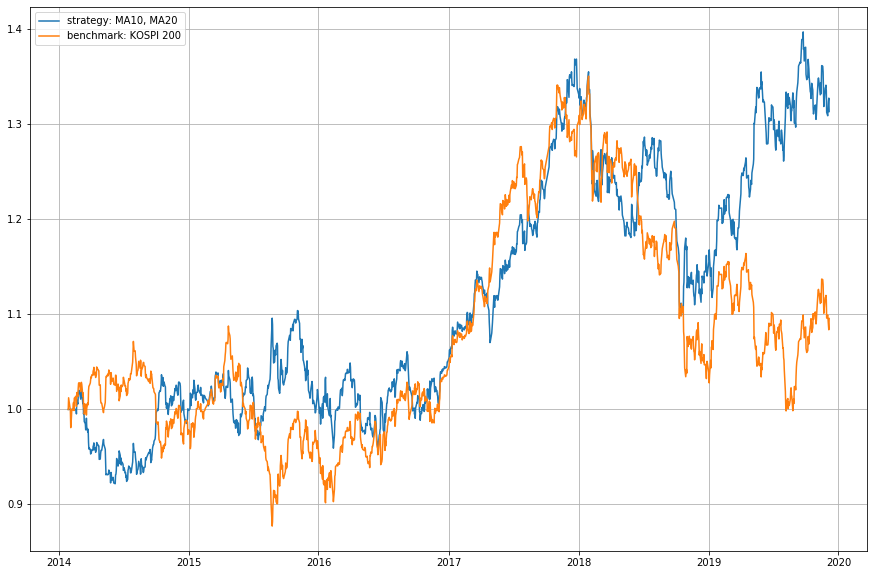

In [14]:
df2['benchmark']=df2['TIGER 200']/df2.loc[df2.index[0],'TIGER 200']
strategy=df2['Portfolio']/df2.loc[df2.index[0],'Portfolio']
plt.figure(figsize=(15,10))
plt.grid()
plt.plot(strategy, label='strategy: MA'+str(X)+', MA'+str(Y))
plt.plot(df2['benchmark'], label='benchmark: KOSPI 200')
plt.legend()

In [15]:
df2

,TIGER 200,TIGER 인버스,MA10,MA20,매수신호,매도신호,보유여부,daily TIGER 200 return,daily TIGER 인버스 return,Portfolio,benchmark
D A T E,,,,,,,,,,,
2014-01-28,25300.0,8445.0,25645.5,25742.00,No,No,No,NaN,NaN,1.000000e+06,1.000000
2014-01-29,25610.0,8370.0,25636.5,25689.00,No,No,No,0.012253,-0.008881,1.000000e+06,1.012253
2014-02-03,25275.0,8475.0,25582.0,25654.00,No,No,No,-0.013081,0.012545,1.000000e+06,0.999012
2014-02-04,24815.0,8640.0,25503.5,25609.50,No,No,No,-0.018200,0.019469,1.000000e+06,0.980830
2014-02-05,24925.0,8595.0,25420.5,25567.75,No,No,No,0.004433,-0.005208,1.000000e+06,0.985178
...,...,...,...,...,...,...,...,...,...,...,...
2019-12-02,27810.0,7415.0,28138.5,28285.50,No,No,TIGER 인버스,0.002885,-0.002690,1.308938e+06,1.099209
2019-12-03,27665.0,7455.0,28042.5,28245.50,No,No,TIGER 인버스,-0.005214,0.005394,1.315999e+06,1.093478
2019-12-04,27490.0,7500.0,27964.0,28195.25,No,No,TIGER 인버스,-0.006326,0.006036,1.323942e+06,1.086561


In [20]:
print('total return of strategy :'+ str(df2.iloc[-1,9]/df2.iloc[1,9]))

total return of strategy :1.3133509587851289


In [21]:
print('total return of KOSPI 200 :'+ str(df2.iloc[-1,10]/df2.iloc[1,10]))

total return of KOSPI 200 :1.0823896915267472
